In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
##from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
X,y=make_blobs(n_samples=1000, centers=3,n_features=2, random_state=23)

In [ ]:
X.shape

(1000, 2)

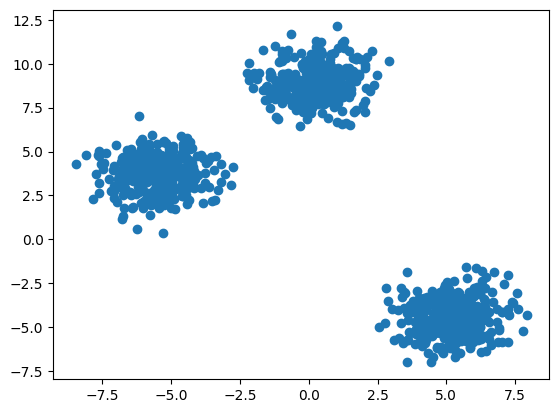

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
##Manual process
#elbow method to select the k value

wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1140.4677884655134,
 1033.098262769125,
 874.7408212158975,
 768.0136729531548,
 679.3545768523461,
 645.9115560573314,
 557.4222671834947]

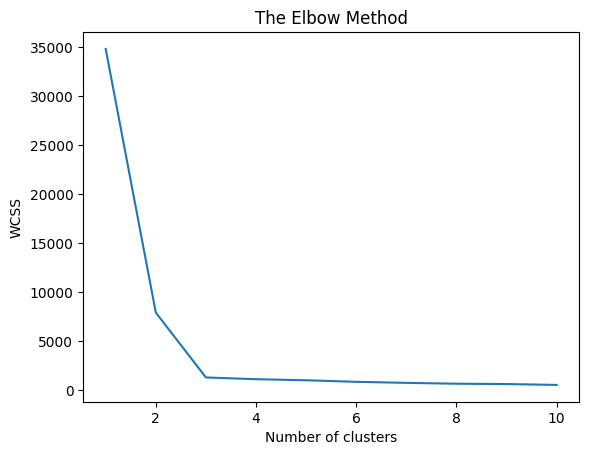

In [ ]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [ ]:
y_labels=kmeans.fit_predict(X_train)

In [ ]:
y_test_label=kmeans.predict(X_test)

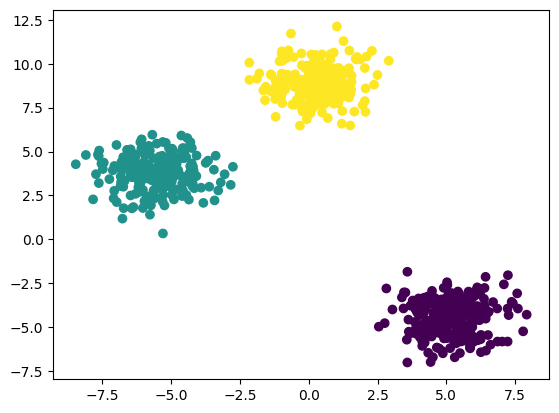

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

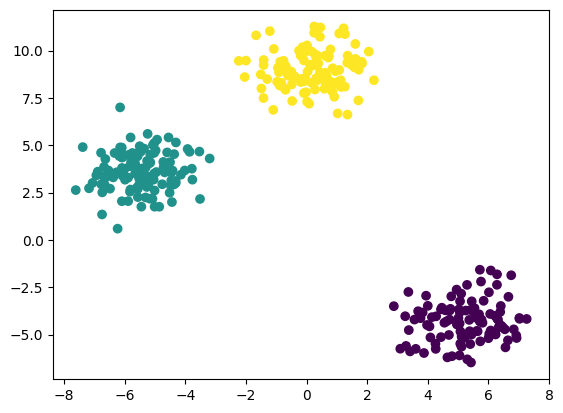

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [ ]:
#knee locator

!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [ ]:
#performance matrics
#silhouette score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score=silhouette_score(X_train,kmeans.labels_)
  silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6505454471731087,
 0.49730922213024037,
 0.4830829116983555,
 0.3401074877552324,
 0.3339514361003207,
 0.32996879165087917,
 0.3405292974341704]

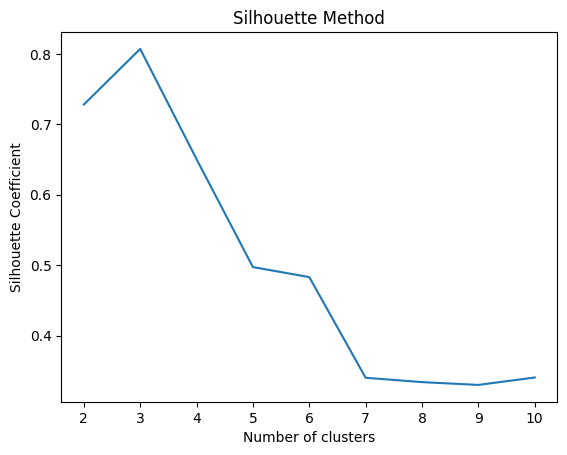

In [ ]:
#plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()